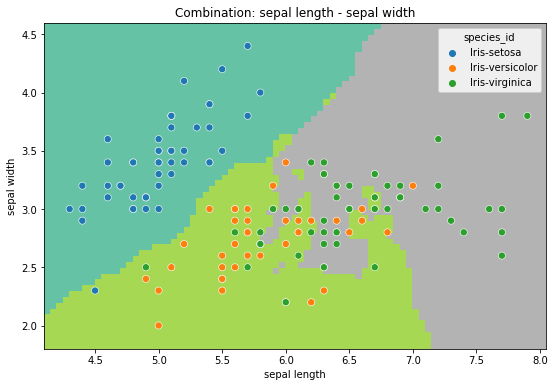

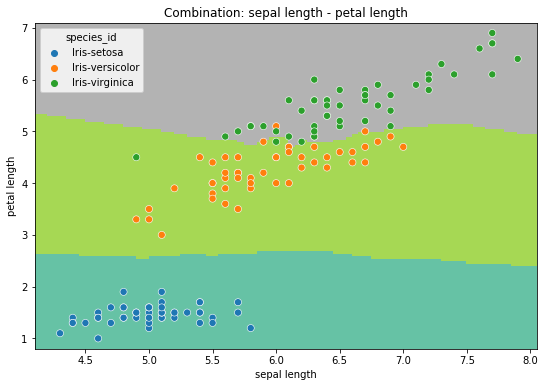

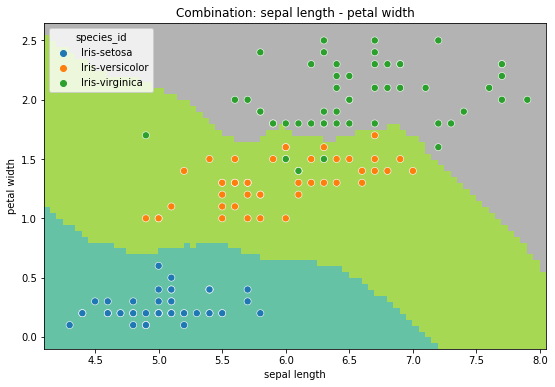

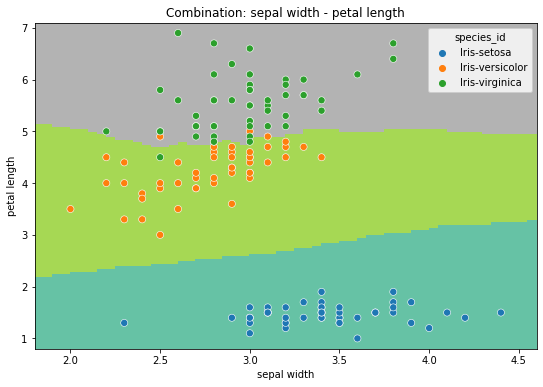

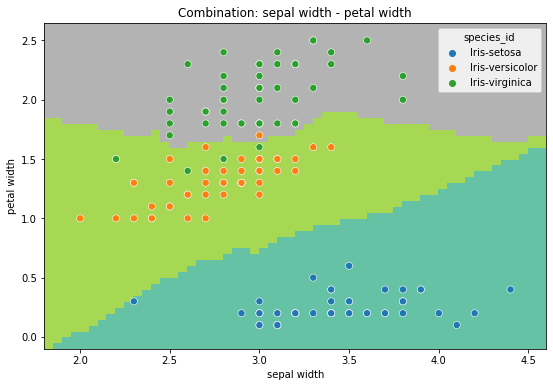

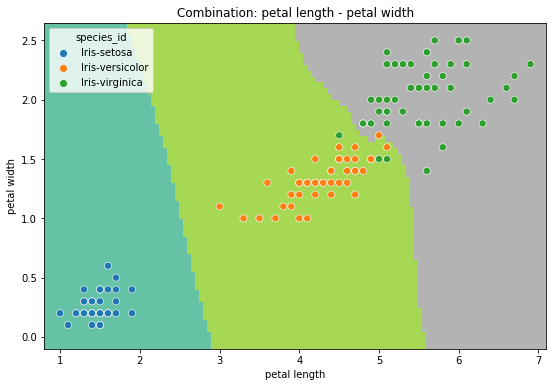

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_table('iris.data', delimiter=',')# učitavanje podataka

# podjela skupa podataka na skup značajka i skup oznaka            
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

# pretvanja tekstualnih vrijednosti u numeričke vrijednosti             
labelencoder = LabelEncoder()
Y= labelencoder.fit_transform(Y)
            
# podjela skupa podataka na skup za treniranje i testiranje            
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.10)
            
           
for i in range(len(df.columns) - 1):
    for j in range(len(df.columns) - 1):
        if j>i:
            
            # stvaranje modela k najbližih susjeda
            KNeighbors=KNeighborsClassifier()
            trained_model=KNeighbors.fit(X_train[:,[i,j]],y_train) # treniranje modela

            # stvaranje vizualne reprazentacije rezultata predviđanja
            X=X_train[:,[i,j]]
            h=0.05
            x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
            y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
            np.arange(y_min, y_max, h))
            Z = trained_model.predict(np.c_[xx.ravel(), yy.ravel()])
            kk=np.c_[xx.ravel(), yy.ravel()]
            Z = Z.reshape(xx.shape)
            
            # iscrtavanje vizualne reprazentacije različitih kombinacija značajki 
            plt.figure(figsize=(9, 6))
            plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set2)

            sns.scatterplot(x=df.columns[i], y=df.columns[j], data=df, hue='species_id', s=50)
            plt.title("Combination: {} - {}".format(df.columns[i], df.columns[j]))
            plt.show()